<a href="https://colab.research.google.com/github/Bettenoch/security_incidence_prediction/blob/main/df_exploration_%26_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/security_incidents_cleaned2.csv')
display(df.head())
print(df.shape)

,incident_id,year,month,day,country_code,country,region,district,city,UN,...,location,latitude,longitude,motive,actor_type,actor_name,details,verified,source,date
0,1,1997,1.0,15.0,KH,Cambodia,Banteay Meanchey,Unknown,Close to Dadaab refugee camo,0,...,Unknown,14.070929,103.099916,Unknown,Unknown,Unknown,1 ICRC national staff killed while working in ...,Archived,Archived,1997-01-15
1,2,1997,1.0,15.0,RW,Rwanda,Northern,Musanze,Ruhengeri,0,...,Office/compound,-1.499840,29.634970,Unknown,Unknown,Unknown,"3 INGO international (Spanish) staff killed, 1...",Archived,Archived,1997-01-15
2,3,1997,2.0,14.0,TJ,Tajikistan,Unknown,Unknown,Close to Dadaab refugee camo,4,...,Unknown,38.628173,70.815654,Unknown,Unknown,Unknown,"3 UN national staff, 1 UN international (Niger...",Archived,Archived,1997-02-14
3,4,1997,2.0,14.0,SO,Somalia,Lower Juba,Kismayo,Kismayo,0,...,Unknown,-0.358216,42.545087,Political,Non-state armed group: Regional,Al-Itihaad al-Islamiya,1 INGO international staff killed by Al ittiha...,Archived,Archived,1997-02-14
4,5,1997,2.0,14.0,RW,Rwanda,Kigali,Kigali,Kigali,1,...,Unknown,-1.950851,30.061508,Political,Unknown,Unknown,1 UN national staff shot and killed in Kigali ...,Archived,Archived,1997-02-14


(4329, 42)


In [5]:
df.columns.tolist()

['incident_id',
 'year',
 'month',
 'day',
 'country_code',
 'country',
 'region',
 'district',
 'city',
 'UN',
 'INGO',
 'ICRC',
 'NRCS_IFRC',
 'NNGO',
 'other',
 'nationals_killed',
 'nationals_wounded',
 'nationals_kidnapped',
 'total_nationals',
 'internationals_killed',
 'internationals_wounded',
 'internationals_kidnapped',
 'total_internationals',
 'total_killed',
 'total_wounded',
 'total_kidnapped',
 'total_affected',
 'gender_male',
 'gender_female',
 'gender_unknown',
 'means_of_attack',
 'attack_context',
 'location',
 'latitude',
 'longitude',
 'motive',
 'actor_type',
 'actor_name',
 'details',
 'verified',
 'source',
 'date']

In [6]:
import pandas as pd

# Examine Data Types and Missing Values
with open('df_info.txt', 'w') as f:
    print(df.info(), file=f)

# Summary Statistics
with open('df_describe.txt', 'w') as f:
    print(df.describe(), file=f)

numerical_cols = ['total_killed', 'total_wounded', 'total_kidnapped', 'total_affected']
for col in numerical_cols:
    if col in df.columns:
        with open(f'df_{col}_describe.txt', 'w') as f:
            print(f"\nSummary statistics for {col}:\n{df[col].describe()}", file=f)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Categorical Variable Exploration
categorical_cols = ['means_of_attack', 'attack_context', 'actor_type', 'country', 'region']
for col in categorical_cols:
    if col in df.columns:
        with open(f'df_{col}_value_counts.txt', 'w') as f:
            print(f"\nValue counts for {col}:\n{df[col].value_counts()}", file=f)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Time Range and Distribution
if 'date' in df.columns:
    with open('df_time_range.txt', 'w') as f:
        print(f"\nTime Range: {df['date'].min()} to {df['date'].max()}", file=f)
    with open('df_incidents_per_year.txt', 'w') as f:
        print(f"\nIncidents per year:\n{df['year'].value_counts().sort_index()}", file=f)
else:
    print("Column 'date' not found in the DataFrame.")

# Geographical Distribution
if 'country' in df.columns and 'region' in df.columns:
    with open('df_top_countries.txt', 'w') as f:
        print(f"\nTop 10 countries by incident count:\n{df['country'].value_counts().head(10)}", file=f)
    with open('df_top_regions.txt', 'w') as f:
        print(f"\nTop 10 regions by incident count:\n{df['region'].value_counts().head(10)}", file=f)
else:
    print("Column 'country' or 'region' not found in the DataFrame.")

# Read the files and display their content
for filename in ['df_info.txt', 'df_describe.txt', 'df_time_range.txt', 'df_incidents_per_year.txt', 'df_top_countries.txt', 'df_top_regions.txt']:
    try:
        with open(filename, 'r') as f:
            print(f"Content of {filename}:\n{f.read()}")
    except FileNotFoundError:
        print(f"File {filename} not found.")

for col in numerical_cols:
    filename = f'df_{col}_describe.txt'
    try:
        with open(filename, 'r') as f:
            print(f"Content of {filename}:\n{f.read()}")
    except FileNotFoundError:
        print(f"File {filename} not found.")

for col in categorical_cols:
    filename = f'df_{col}_value_counts.txt'
    try:
        with open(filename, 'r') as f:
            print(f"Content of {filename}:\n{f.read()}")
    except FileNotFoundError:
        print(f"File {filename} not found.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   incident_id               4329 non-null   int64  
 1   year                      4329 non-null   int64  
 2   month                     4329 non-null   float64
 3   day                       4329 non-null   float64
 4   country_code              4329 non-null   object 
 5   country                   4329 non-null   object 
 6   region                    4329 non-null   object 
 7   district                  4329 non-null   object 
 8   city                      4329 non-null   object 
 9   UN                        4329 non-null   int64  
 10  INGO                      4329 non-null   int64  
 11  ICRC                      4329 non-null   float64
 12  NRCS_IFRC                 4329 non-null   float64
 13  NNGO                      4329 non-null   float64
 14  other   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00


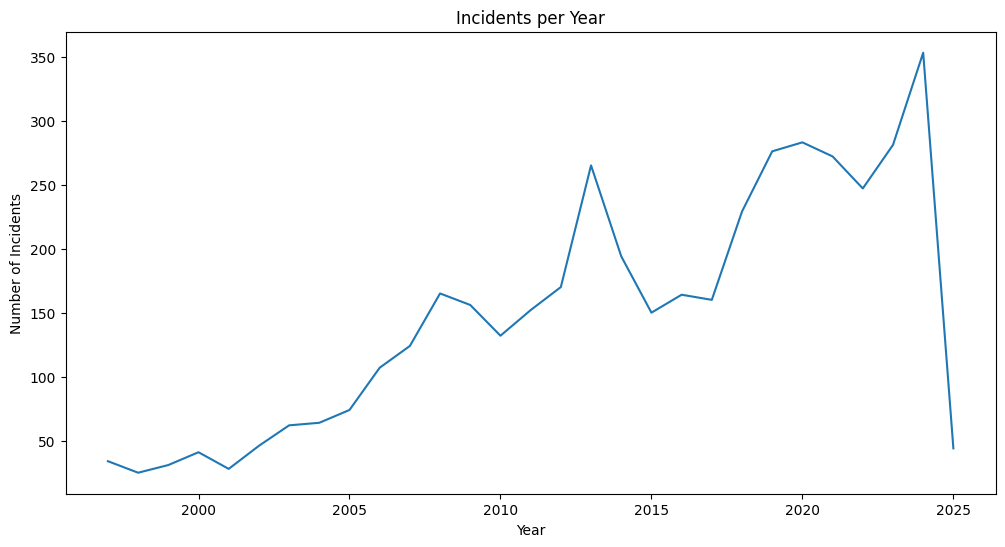

In [7]:
!pip install -U kaleido
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Time Series Plots
plt.figure(figsize=(12, 6))
plt.title('Incidents per Year')
df.groupby('year')['incident_id'].count().plot()
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.savefig('incidents_per_year.png')
plt.show()

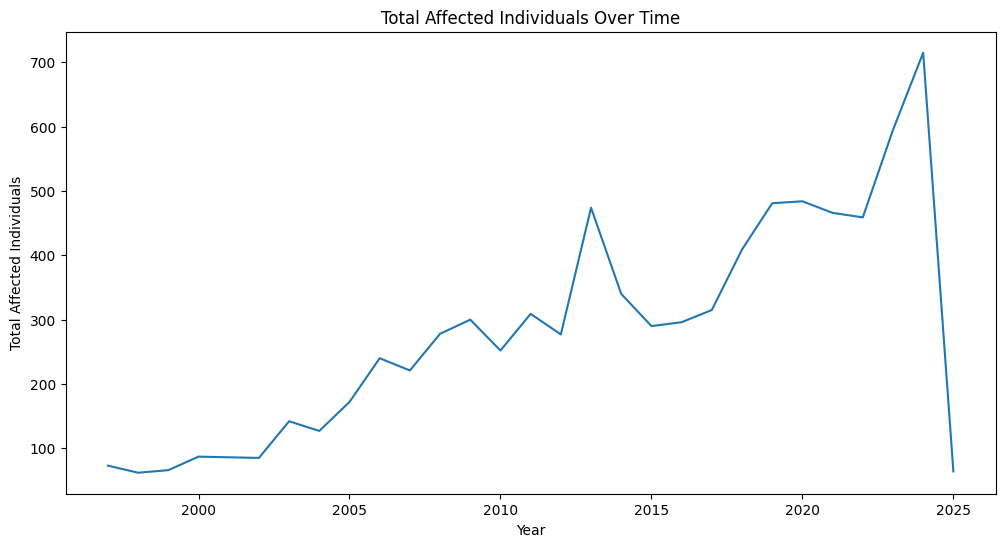

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Total Affected Individuals Over Time')
df.groupby('year')['total_affected'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Total Affected Individuals')
plt.savefig('total_affected_over_time.png')
plt.show()

In [9]:
# Geospatial Visualizations
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="country",
                        hover_data=["city", "total_affected"],
                        color_discrete_sequence=["fuchsia"], zoom=1, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


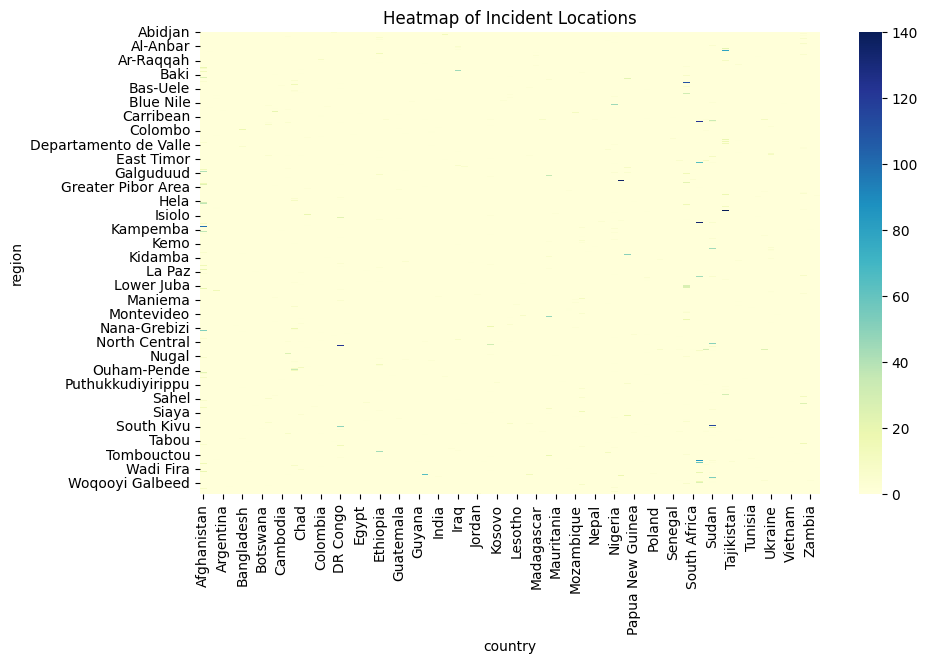

In [10]:
# Heatmap by region or country
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['region'], df['country']), cmap="YlGnBu")
plt.title('Heatmap of Incident Locations')
plt.savefig('heatmap_by_region.png')
plt.show()

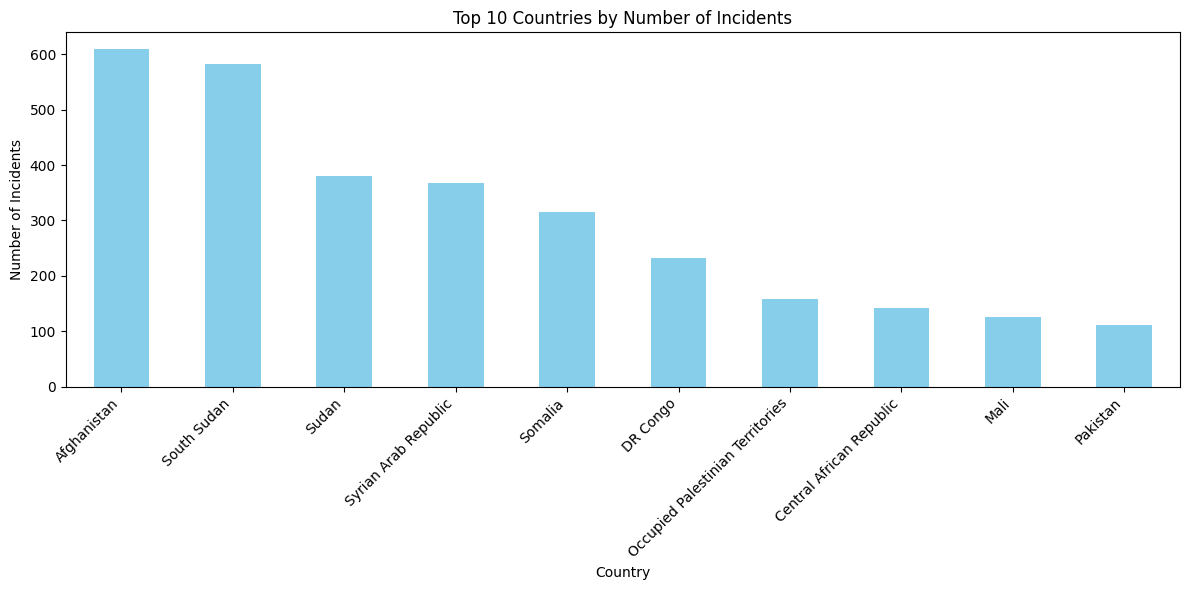

In [11]:
# Bar Charts
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

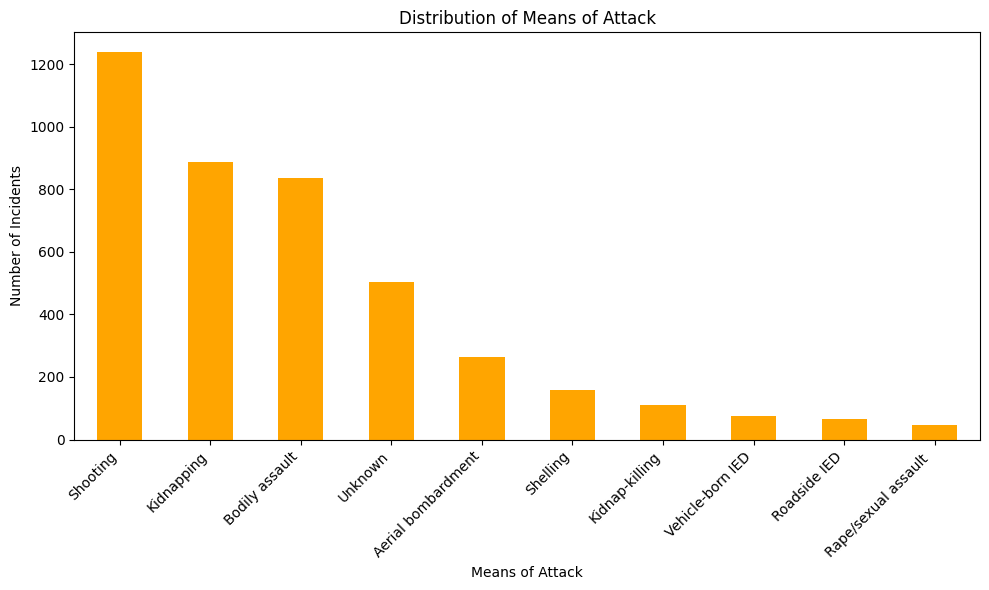

In [12]:
plt.figure(figsize=(10, 6))
df['means_of_attack'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Distribution of Means of Attack')
plt.xlabel('Means of Attack')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('means_of_attack.png')
plt.show()



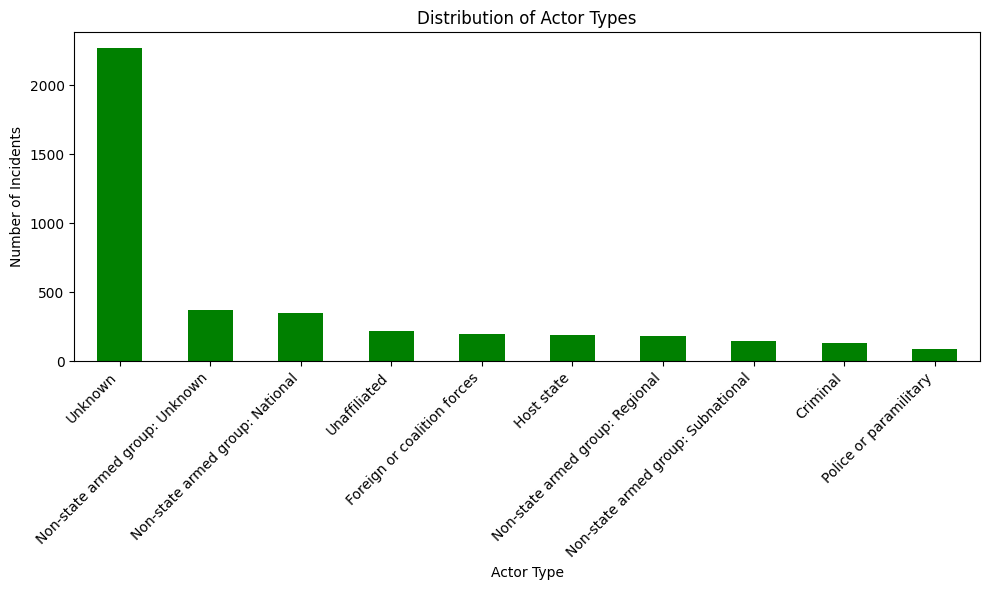

In [13]:
plt.figure(figsize=(10, 6))
df['actor_type'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Distribution of Actor Types')
plt.xlabel('Actor Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('actor_type.png')
plt.show()


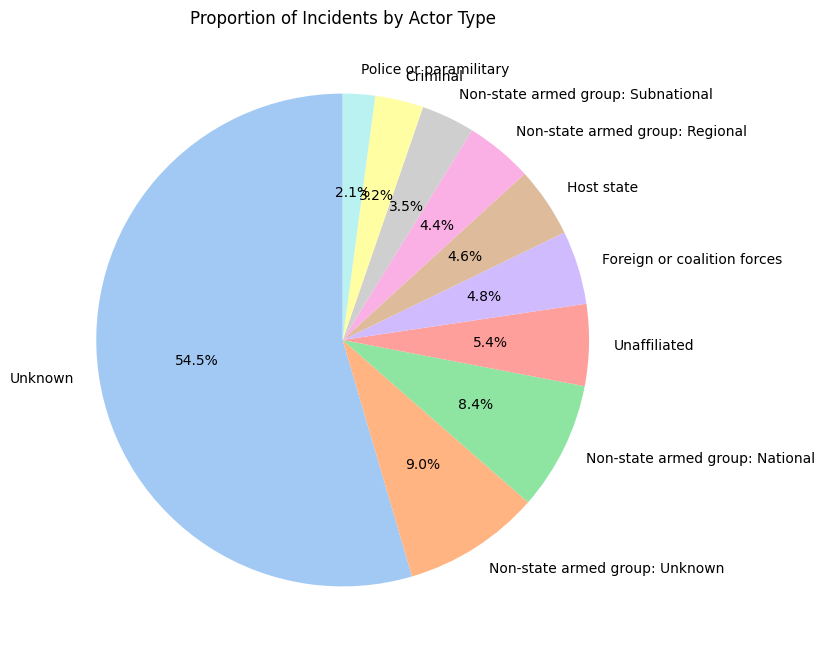

In [14]:
# Pie/Donut Charts
plt.figure(figsize=(8, 8))
df['actor_type'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Incidents by Actor Type')
plt.ylabel('')
plt.savefig('actor_type_proportion.png')
plt.show()

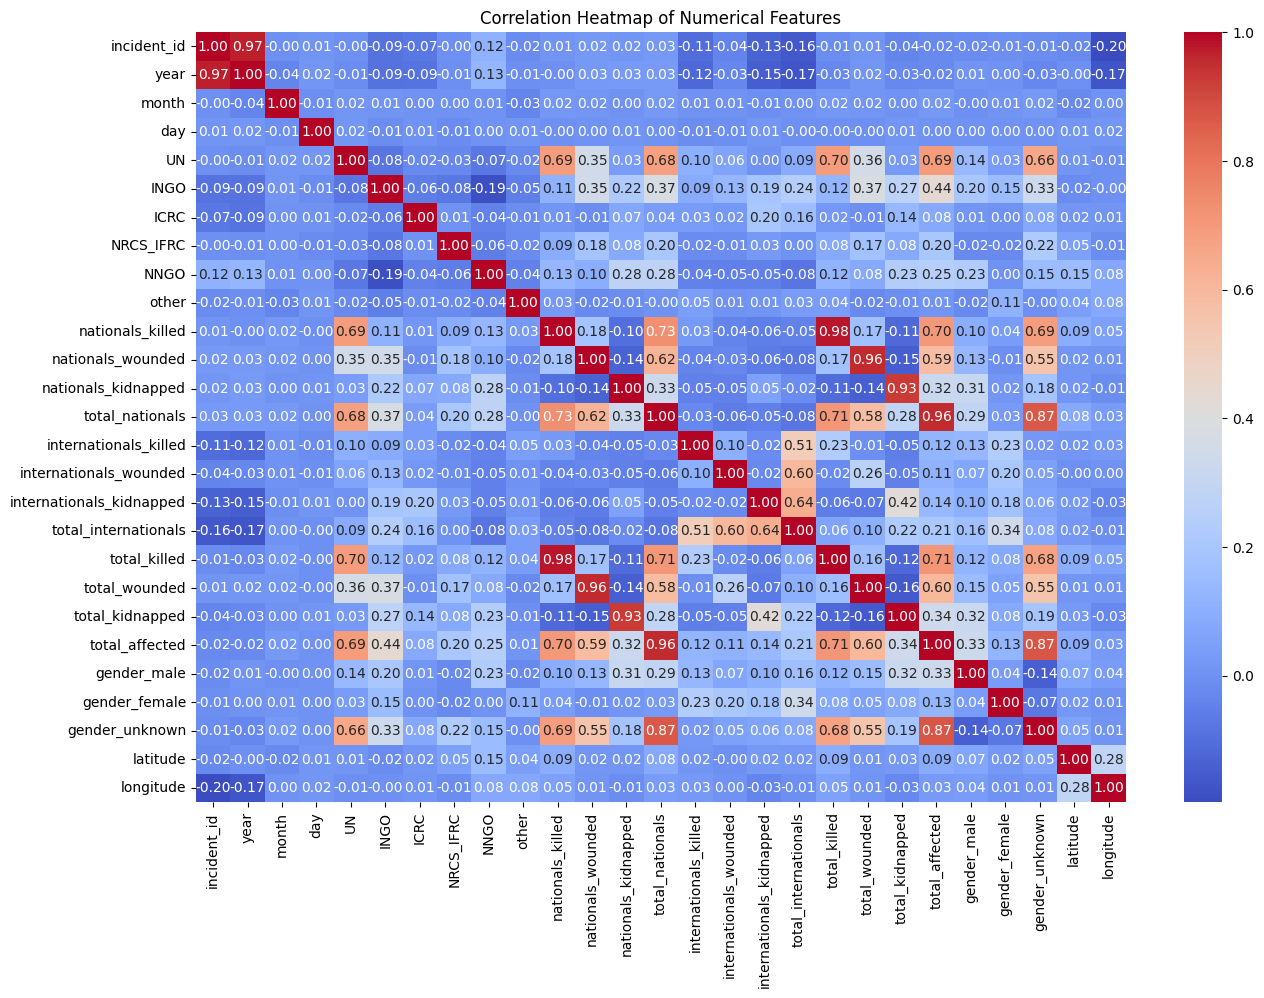

In [17]:
# Correlation Heatmap
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()


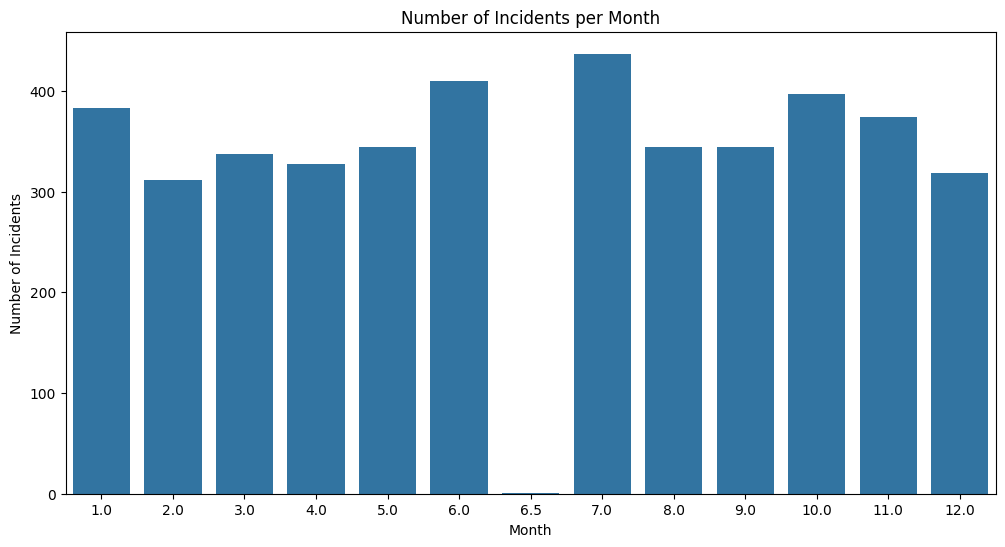

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.title('Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

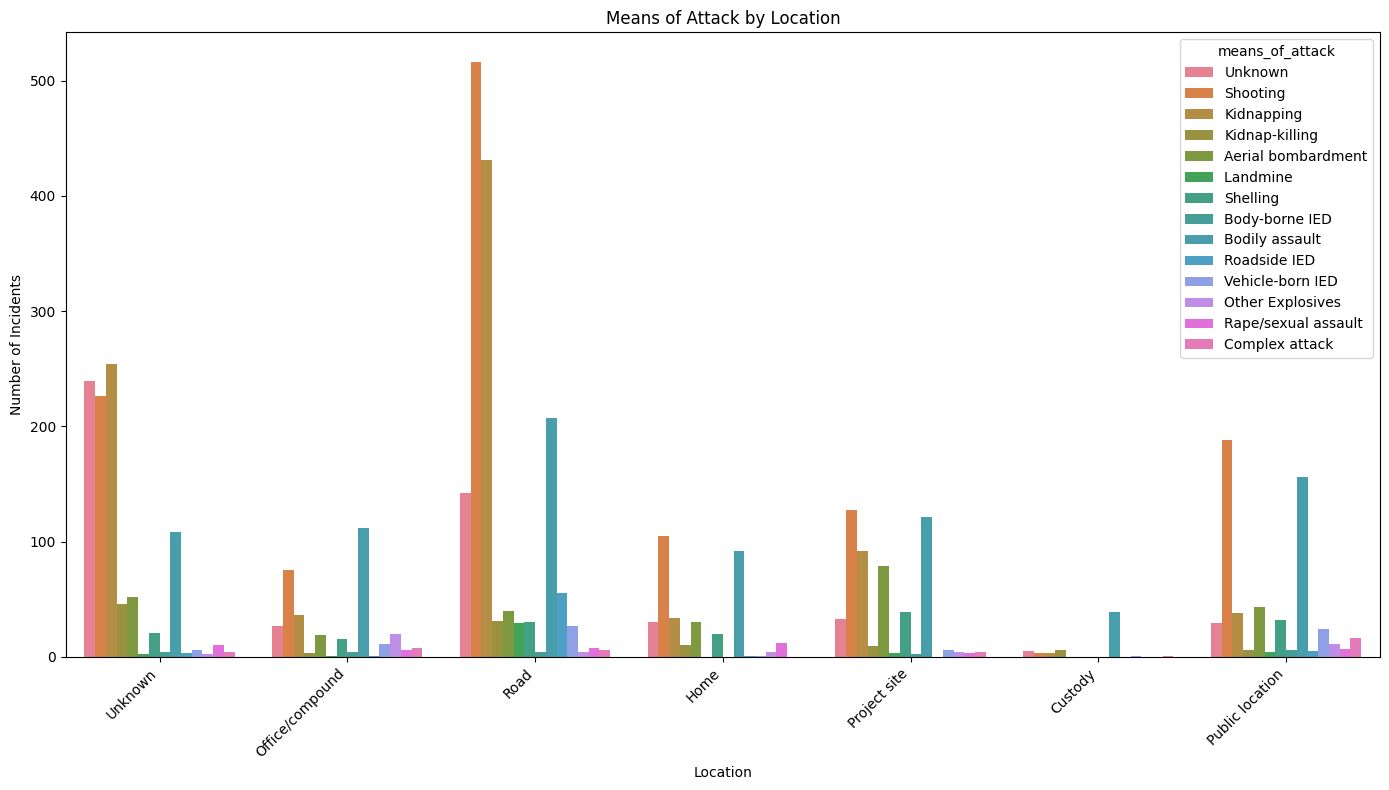

In [19]:
# Analyze the relationship between means of attack and location
plt.figure(figsize=(14, 8))
sns.countplot(x='location', hue='means_of_attack', data=df)
plt.title('Means of Attack by Location')
plt.xlabel('Location')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

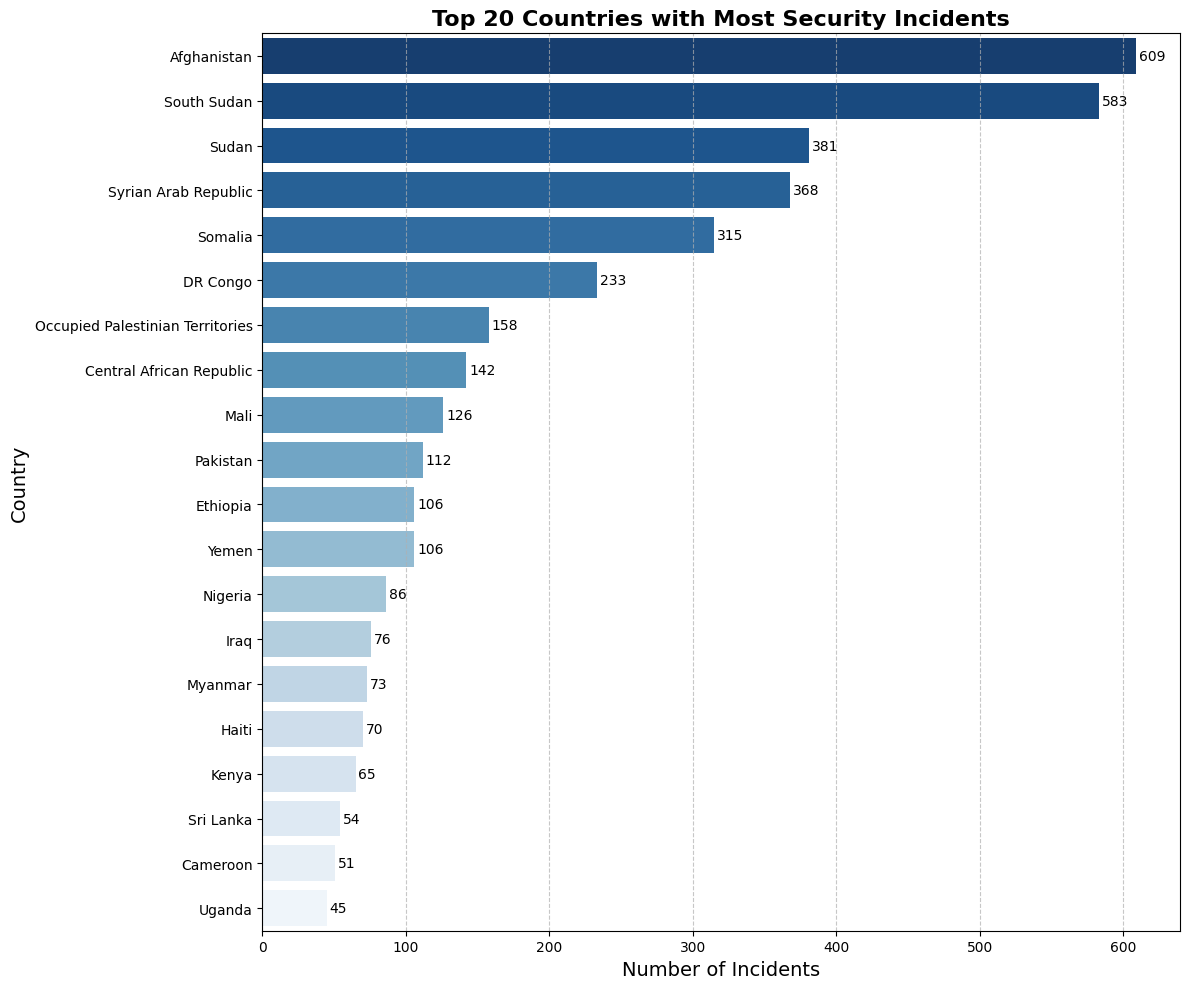

In [26]:

#  Geographical Distribution
top_countries = df['country'].value_counts().head(20)


top_countries_df = pd.DataFrame({
    'country': top_countries.index,
    'incidents': top_countries.values
})

plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_countries_df,
    y='country',
    x='incidents',
    hue='country',
    palette='Blues_r',
    dodge=False,
    legend=False
)

plt.title('Top 20 Countries with Most Security Incidents', fontsize=16, weight='bold')
plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top_countries.values):
    plt.text(value + 2, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()